In [112]:
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
from IPython.display import Image

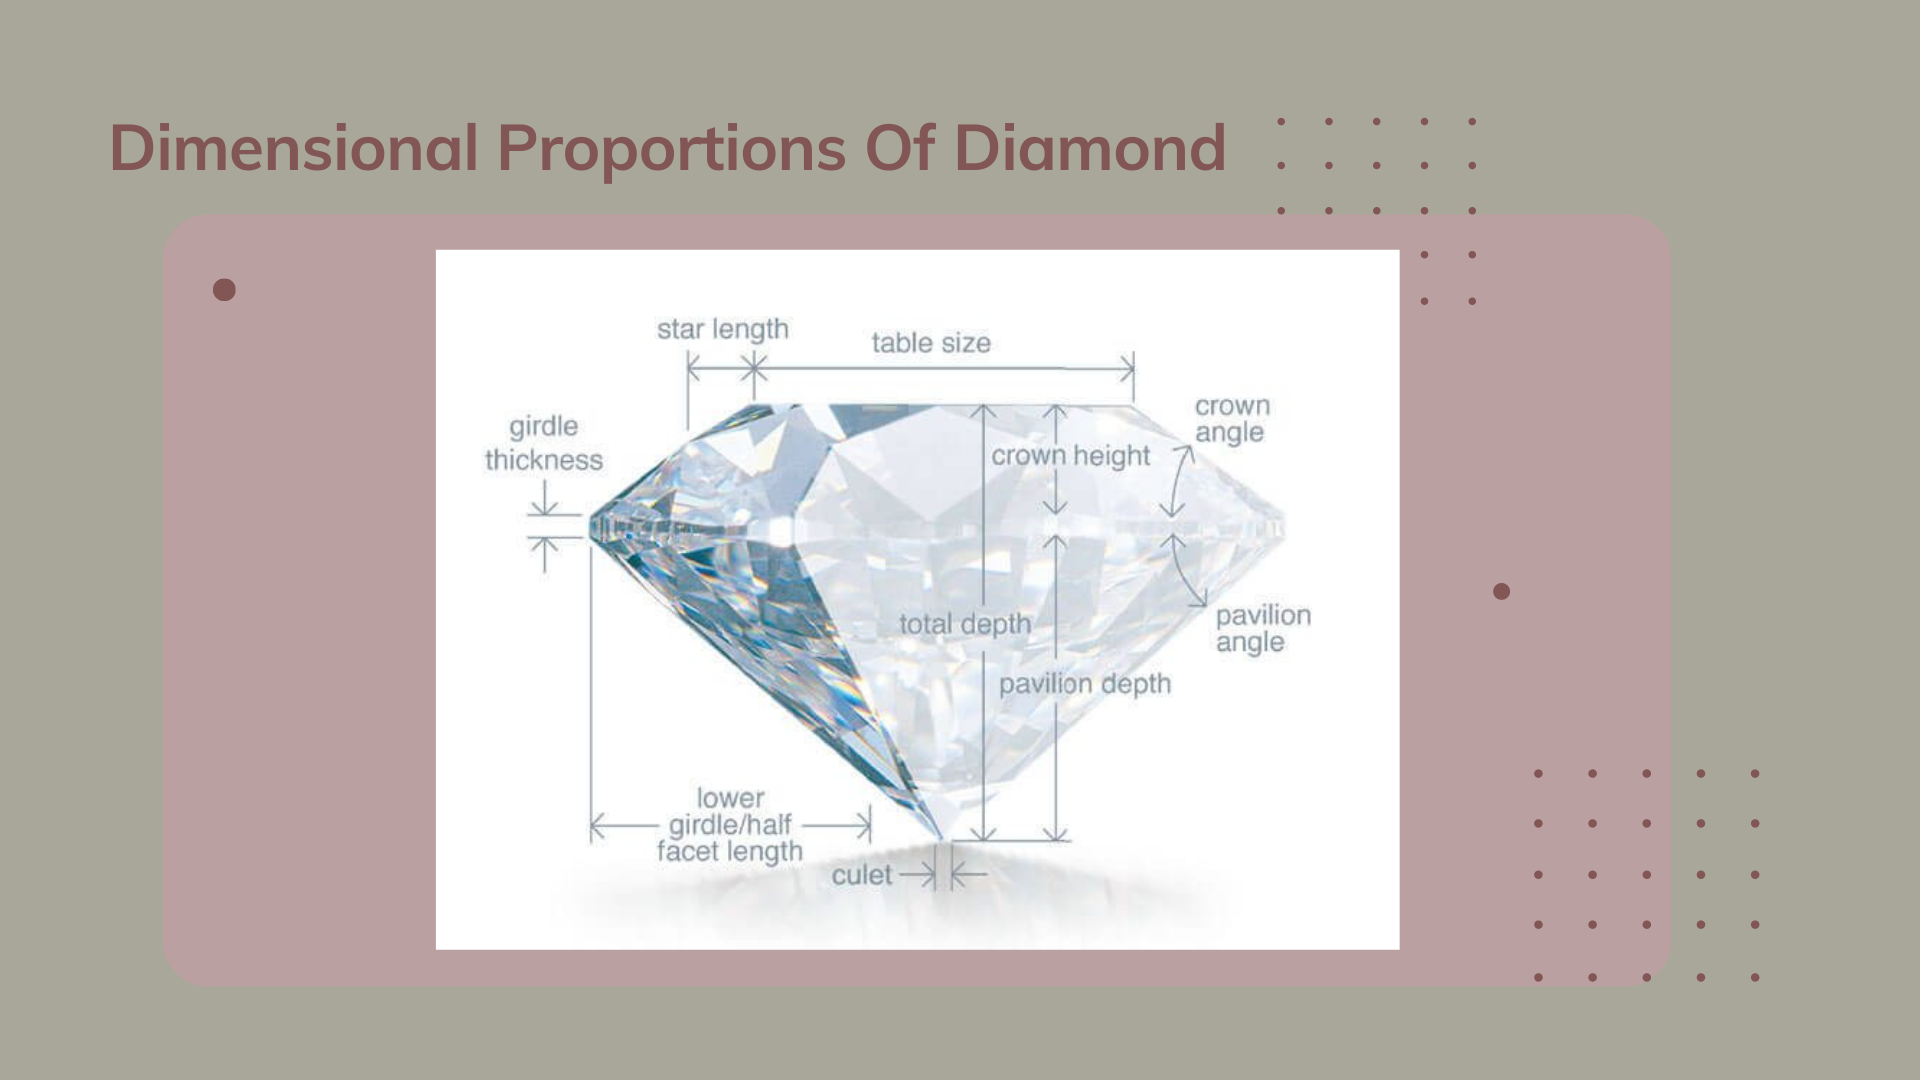

In [113]:
Image(filename=r"C:\Users\91992\Downloads\diamond.jpg")

In [114]:
df = pd.read_csv(r"C:\Users\91992\Untitled Folder\diamonds.csv")

In [115]:
df.head()  

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [116]:
df.shape 

(53940, 11)

In [83]:
#Explanation of 2 columns 
#Table : The width of the diamond's table expressed as a percentage of its average diameter
#Depth : The height of a diamond, measured from the culet to the table, divided by its average girdle diameter

In [6]:
df.isna().sum() 

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Data has no null values so no need to create an imputer

## EDA 

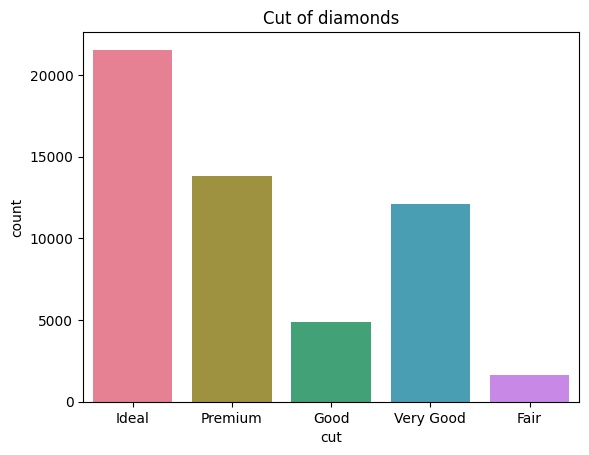

In [7]:
sns.countplot(data=df,x = 'cut', palette='husl') 
plt.title("Cut of diamonds")
plt.show()

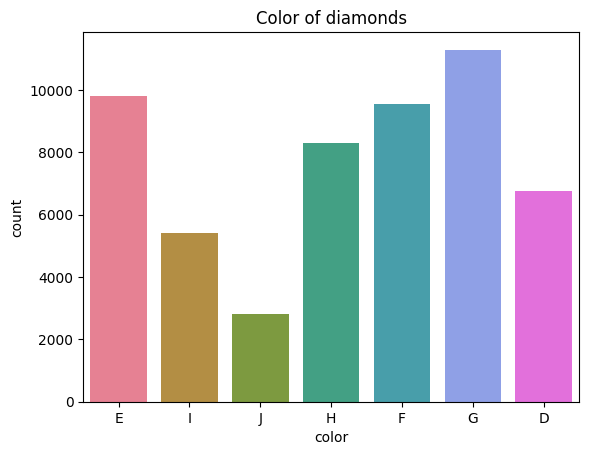

In [8]:
sns.countplot(data=df,x = 'color', palette='husl') 
plt.title("Color of diamonds")
plt.show()

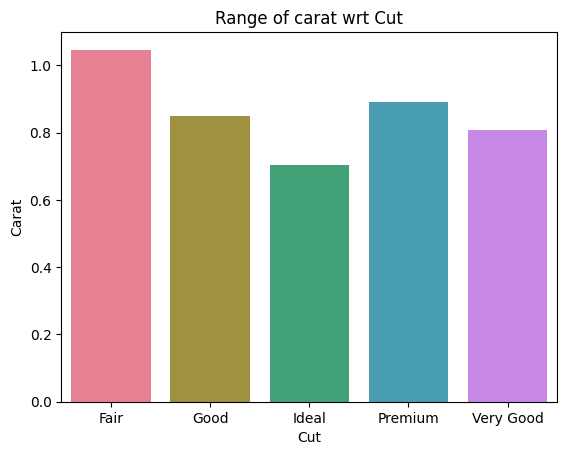

In [9]:
#Checking avg carat value for each type of cut
temp = df.groupby(['cut']).carat.mean().reset_index()
#temp 
sns.barplot(data = temp, x = 'cut', y = 'carat', palette='husl')
plt.xlabel('Cut')
plt.ylabel('Carat')
plt.title('Range of carat wrt Cut')
plt.show()  

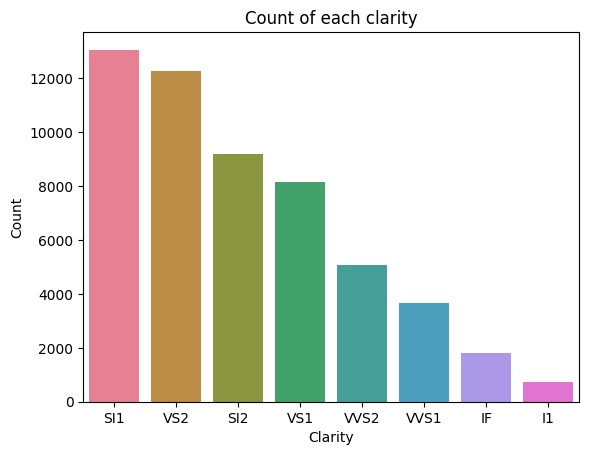

In [10]:
temp = df.clarity.value_counts().reset_index()
#temp
sns.barplot(data=temp, x = 'index', y = 'clarity', palette='husl')  
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.title('Count of each clarity')
plt.show()  

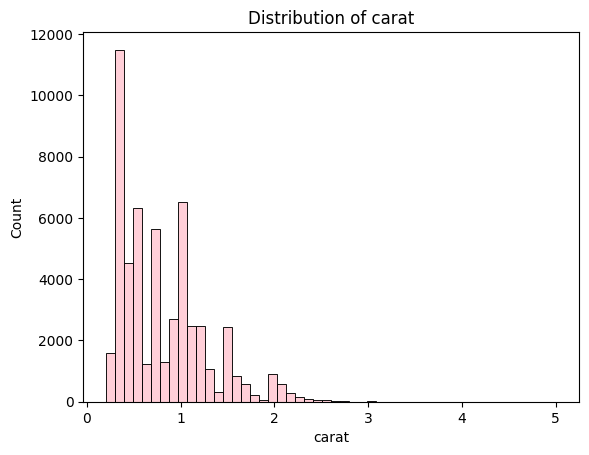

In [11]:
#Check distribtuon of carat
sns.histplot(data=df, x="carat", bins=50, color='pink')
plt.title('Distribution of carat') 
plt.show()

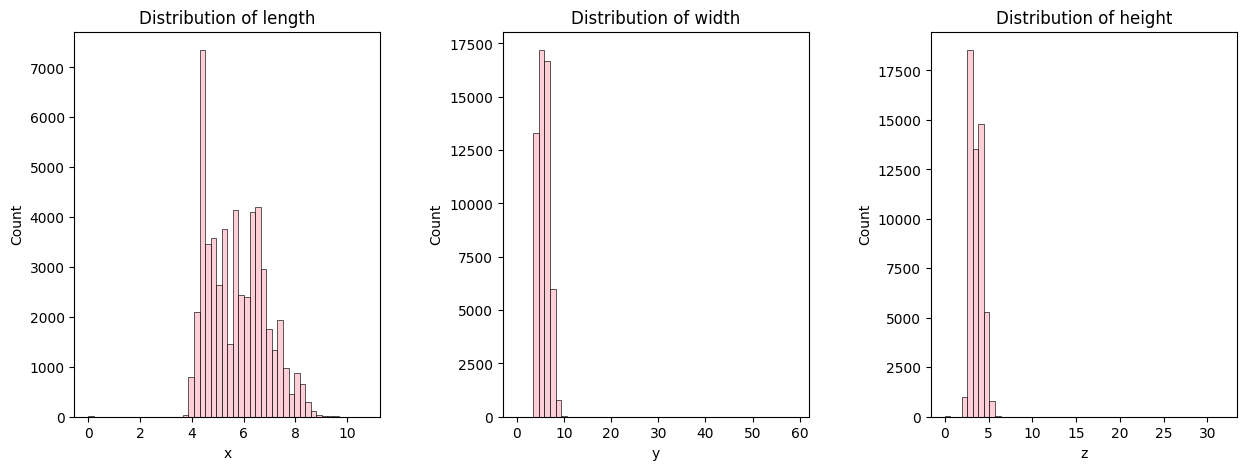

In [12]:
#Distribution for width, depth and height
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.histplot(data=df, x="x", bins=50, color='pink', ax=axs[0])
axs[0].set_title('Distribution of length')

sns.histplot(data=df, x="y", bins=50, color='pink', ax=axs[1])
axs[1].set_title('Distribution of width')

sns.histplot(data=df, x="z", bins=50, color='pink', ax=axs[2])
axs[2].set_title('Distribution of height')

plt.subplots_adjust(wspace=0.4) 
plt.show()

#Note : x is length, y is width and z is height 

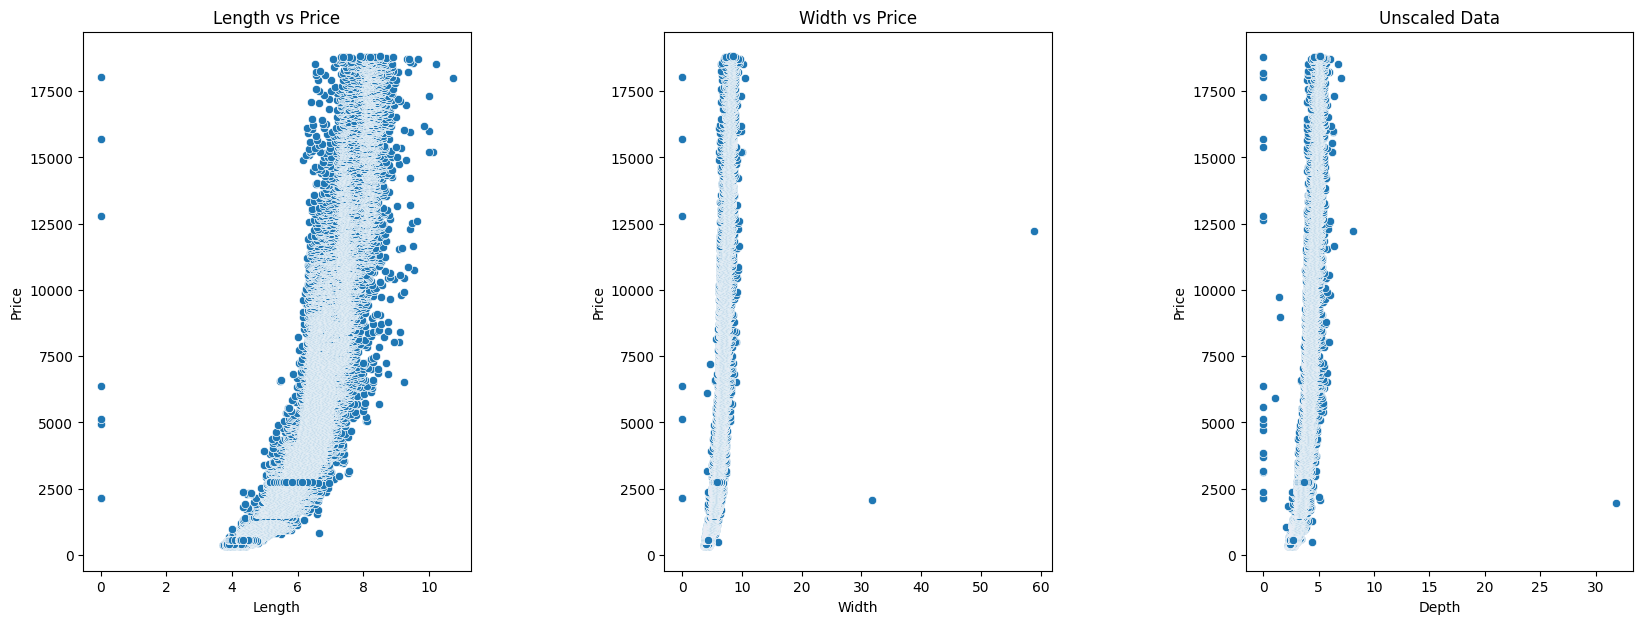

In [13]:
plt.figure(figsize=(20,7))
#scatter for length vs price
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='x', y='price')
plt.xlabel('Length')
plt.ylabel('Price')
plt.title('Length vs Price')  

#scatter for width vs price
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='y', y='price')
plt.xlabel('Width')
plt.ylabel('Price')
plt.title('Width vs Price')  

#scatter for depth vs price
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='z', y='price')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Depth vs Price') 

plt.subplots_adjust(wspace=0.5)
plt.title('Unscaled Data')
plt.show() 

### Outcome :Somewhat linear relation seen 

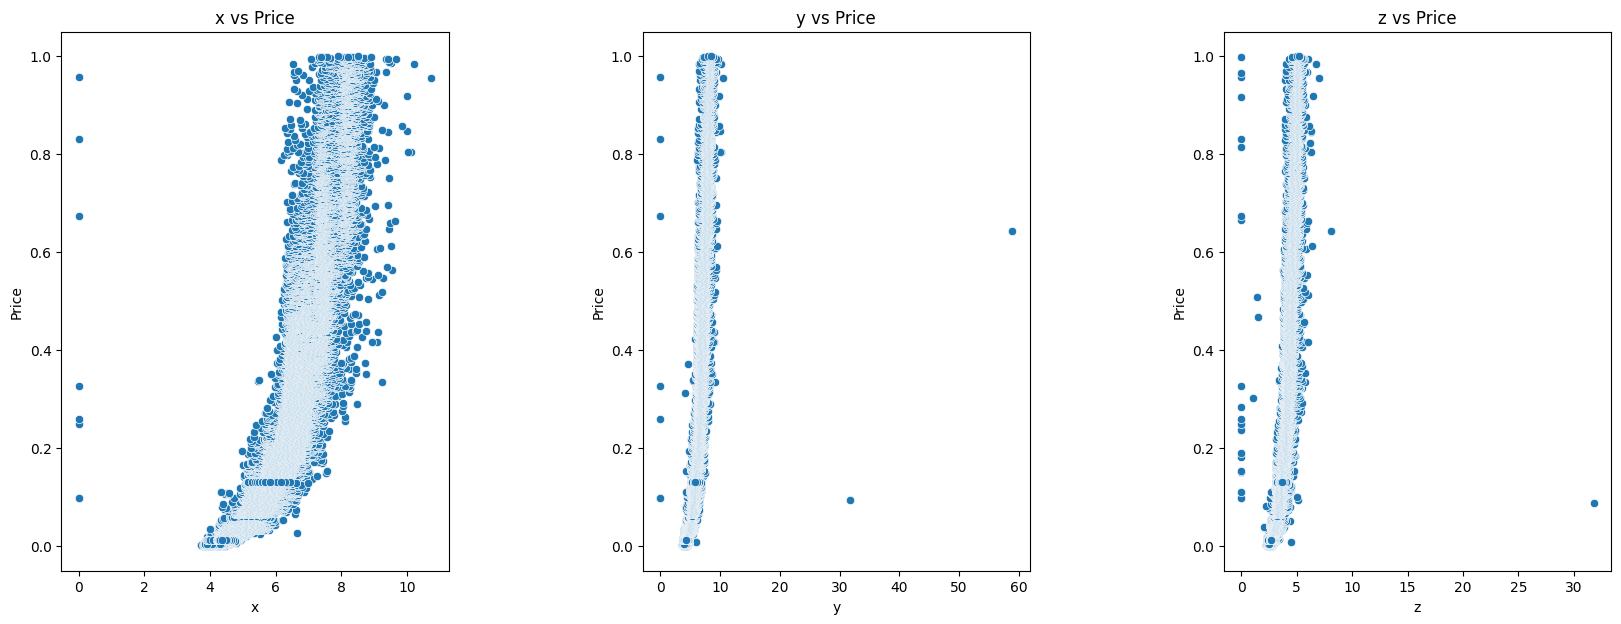

In [14]:
temp = df.copy()
#Here, I will scale data between 0 and 1 
temp['price'] = (temp['price'] - temp['price'].min()) / (temp['price'].max() - temp['price'].min())
# this will scale data between 0 and 1 

plt.figure(figsize=(20,7))     
#scatter for length vs price
plt.subplot(1, 3, 1)
sns.scatterplot(data=temp, x='x', y='price')
plt.xlabel('x')
plt.ylabel('Price')
plt.title('x vs Price')  

#scatter for width vs price
plt.subplot(1, 3, 2)
sns.scatterplot(data=temp, x='y', y='price')
plt.xlabel('y')
plt.ylabel('Price')
plt.title('y vs Price')  

#scatter for depth vs price
plt.subplot(1, 3, 3)
sns.scatterplot(data=temp, x='z', y='price')
plt.xlabel('z') 
plt.ylabel('Price')
plt.title('z vs Price') 

plt.subplots_adjust(wspace=0.5)
plt.show() 

### Outcome : scaling data doesnt do anything to relationships

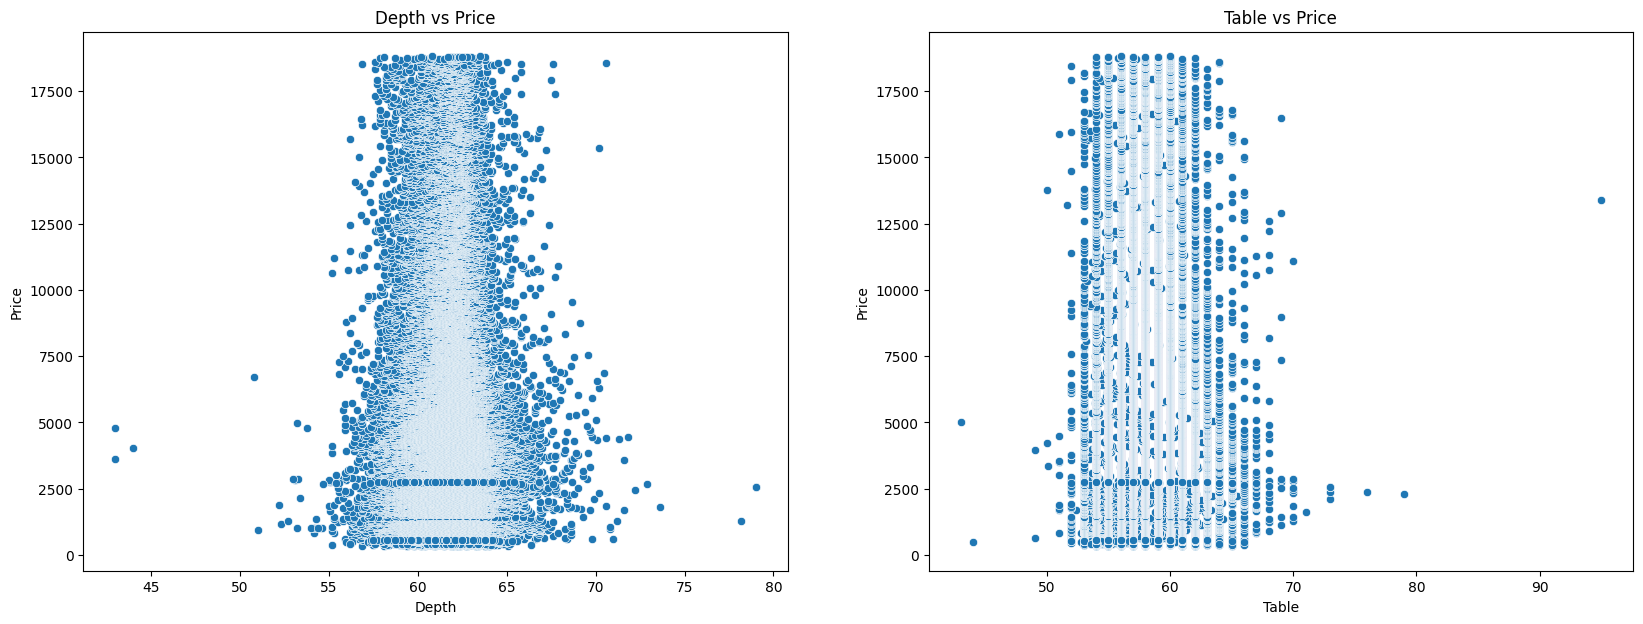

In [15]:
plt.figure(figsize=(20,7))     
#scatter for length vs price
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='depth', y='price')
plt.xlabel('Depth') 
plt.ylabel('Price')
plt.title('Depth vs Price')  

#scatter for width vs price
plt.subplot(1, 2, 2) 
sns.scatterplot(data=df, x='table', y='price')   
plt.xlabel('Table')
plt.ylabel('Price')
plt.title('Table vs Price')

plt.show() 

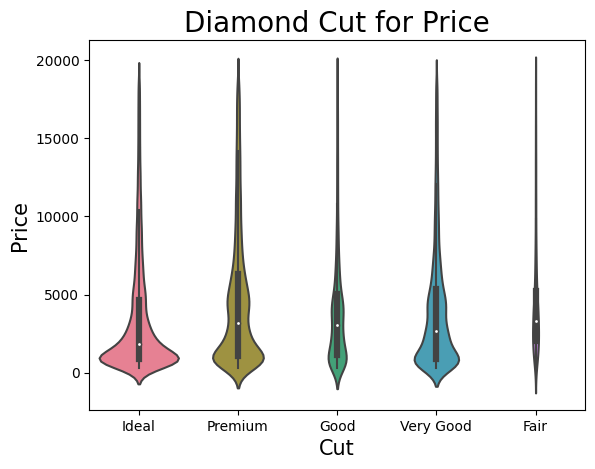

In [16]:
ax = sns.violinplot(x="cut",y="price", data=df, palette='husl',scale= "count")
ax.set_title("Diamond Cut for Price", fontsize = 20)
ax.set_ylabel("Price", fontsize = 15)
ax.set_xlabel("Cut", fontsize = 15)
plt.show()

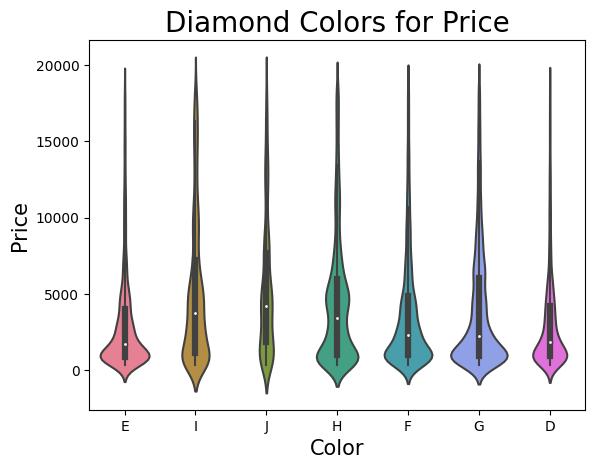

In [17]:
ax = sns.violinplot(x="color",y="price", data=df, palette='husl',scale= "count")
ax.set_title("Diamond Colors for Price", fontsize = 20)
ax.set_ylabel("Price", fontsize = 15)
ax.set_xlabel("Color", fontsize = 15)
plt.show()

### Outcome: No linear relationship 

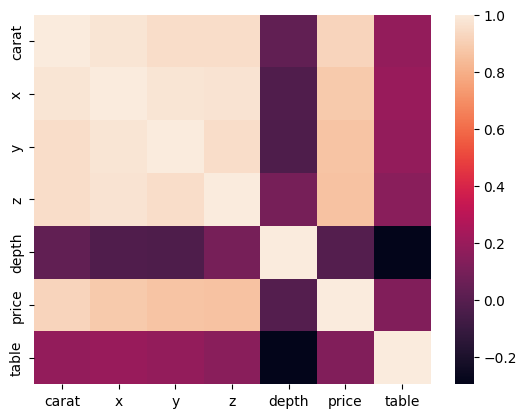

In [18]:
sns.heatmap(df[['carat', 'x', 'y', 'z', 'depth', 'price', 'table']].corr())
plt.show() 

### Outcome of correlation heatmap : High correlation between x, y, z. Also high correlation between carat with x,y,z price. So if I apply regression, I will have to deal with multi-collinearity if I use x,y,z, carat or a combination of them as my features. But since I apply classification, it wont matter much as the observations are typically independent and identically distributed. Some models will get affected like Logistic Regression. But tree like models are generally better at handling this 

### From one of the datacamp courses, I found that we can visualise multi-dimensional data as clusters using t-SNE. So I will make 5 clusters one for each class in cut (ideal, premium, good, very good, fair) and position of each diamond on a 2d axis as a function of x,y and z  

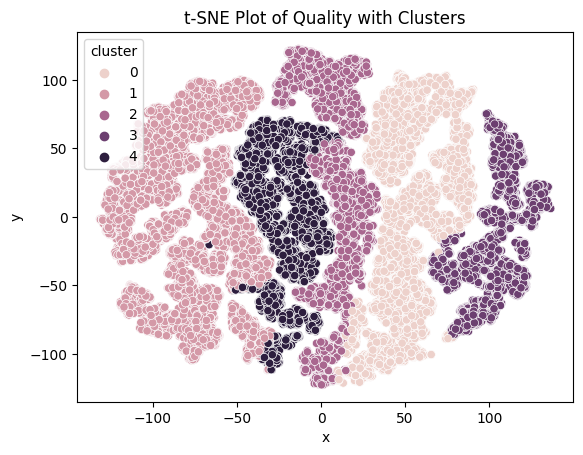

In [21]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans # use Kmeans to find no of classes in cut.

 
n_clusters = len(df['cut'].unique())
X = df[['x', 'y', 'z']]
y = df['cut']
  
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=5)
kmeans.fit(X)  
cluster_labels = kmeans.labels_

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(X, y=cluster_labels)
tsne_df = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'cluster': cluster_labels})

sns.scatterplot(data=tsne_df, x='x', y='y', hue='cluster')    
plt.title('t-SNE Plot of Quality with Clusters')
plt.show()

### Outcome : Proper cluseters are made with little/no overlap  

In [117]:
df.drop(columns=['Unnamed: 0'], inplace= True) 

In [71]:
print(df.corr())

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


C:\Users\91992\AppData\Local\Temp\ipykernel_4136\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [22]:
df.describe()  

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Outcome : High collinearity between the input features : x,y,z,carat 

## I will predict cut using other variables. So it is a multi-class classification problem 

In [118]:
#Scaling the columns between 0 and 1 
df_scaled = df.copy()
df_scaled['price'] = (df_scaled['price'] - df_scaled['price'].min()) / (df_scaled['price'].max() - df_scaled['price'].min())
df_scaled['depth'] = (df_scaled['depth'] - df_scaled['depth'].min()) / (df_scaled['depth'].max() - df_scaled['depth'].min())
df_scaled['table'] = (df_scaled['table'] - df_scaled['table'].min()) / (df_scaled['table'].max() - df_scaled['table'].min())
df_scaled['x'] = (df_scaled['x'] - df_scaled['x'].min()) / (df_scaled['x'].max() - df_scaled['x'].min())
df_scaled['y'] = (df_scaled['y'] - df_scaled['y'].min()) / (df_scaled['y'].max() - df_scaled['y'].min())
df_scaled['z'] = (df_scaled['z'] - df_scaled['z'].min()) / (df_scaled['z'].max() - df_scaled['z'].min())

In [73]:
df_scaled.head() 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.21,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.23,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.29,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.31,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


In [119]:
from sklearn.model_selection import train_test_split
temp = df_scaled.drop(columns = 'cut')
df_scaled = pd.get_dummies(temp)
X = df_scaled 
y = df['cut'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trying different models 

### Decision Tree 

### On data with multi-collinearity (No PCA done) 

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV # Since grid got big, I used RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
X = df_scaled 
y = df['cut'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
d1 = DecisionTreeClassifier()
param_grid = {
    
    'max_depth' : range(1,20),   
    'min_samples_leaf' : range(2,15), 
    'min_samples_split' : range(2,15),
    'class_weight' : ['balanced', None]  
} 
g1 = RandomizedSearchCV(d1, param_distributions=param_grid, cv=5)
g1.fit(X_train, y_train) 
y_pred = g1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)  

0.7538005190952911


In [76]:
print(g1.best_params_) # best accuracy was got at these hyperparameters 

{'min_samples_split': 10, 'min_samples_leaf': 11, 'max_depth': 14, 'class_weight': None}


### Now that my best params are at approx these values, I can run a smaller grid covering all values around the above to hopefully increase accuracy (Even though grid is small, it may take some time 

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    
    'max_depth' : range(12,18),   
    'min_samples_leaf' : range(12,20), 
    'min_samples_split' : range(11,15),  
} 
grid_g1 = GridSearchCV(d1, param_grid=param_grid, cv = 5, n_jobs = -1)
grid_g1.fit(X_train, y_train)
y_pred = grid_g1.predict(X_test)
no_pca_acc = accuracy_score(y_test, y_pred)
print(no_pca_acc) 

#Very small increase.The general trend is smaller Grid works better after making a random search

0.7553763440860215


In [78]:
print(grid_g1.best_params_) # best accuracy was got at these hyperparameters

{'max_depth': 17, 'min_samples_leaf': 16, 'min_samples_split': 11}


In [79]:
df_results = pd.DataFrame(g1.cv_results_)
df_results.drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'std_test_score'], inplace= True)
df_results.sort_values(by = 'rank_test_score', ascending= True)
df_results.head() # this df shows performance of model on each split of our randomsearch. Just displaying what happends in CV.
#Wont print this for each model to avoid repetition

,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,2,14,1,None,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.601437,0.599583,0.602781,0.602202,0.600927,0.601386,10
1,4,9,9,None,"{'min_samples_split': 4, 'min_samples_leaf': 9...",0.748928,0.734330,0.746698,0.740672,0.745075,0.743141,3
2,6,7,7,None,"{'min_samples_split': 6, 'min_samples_leaf': 7...",0.740355,0.729811,0.740324,0.732677,0.737543,0.736142,4
3,6,12,14,balanced,"{'min_samples_split': 6, 'min_samples_leaf': 1...",0.730506,0.730043,0.728505,0.720162,0.730359,0.727915,6
4,13,13,14,None,"{'min_samples_split': 13, 'min_samples_leaf': ...",0.757618,0.745568,0.753302,0.746582,0.751912,0.750996,2


### On data with PCA done 

In [80]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
df_scaled = pd.get_dummies(temp)
X = df_scaled 
y = df['cut'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
subset_features = ['x', 'y', 'z', 'carat'] # features with high multi-collinearity as seen in correlation matrix
pca =PCA(n_components=1) 
X_train_subset_pca = pca.fit_transform(X_train[subset_features])
X_train['pca_1'] = X_train_subset_pca[:,0]
X_train.drop(columns=subset_features, inplace=True) 

X_test_subset_pca = pca.transform(X_test[subset_features])
X_test['pca_1'] = X_test_subset_pca[:,0]
X_test.drop(columns=subset_features, inplace=True) 




from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV # Since grid got big, I used RandomizedSearchCV
from sklearn.metrics import accuracy_score
d1 = DecisionTreeClassifier()
param_grid = {
    
    'max_depth' : range(1,20),   
    'min_samples_leaf' : range(2,15), 
    'min_samples_split' : range(2,15),
    'class_weight' : ['balanced', None]  
} 
g1 = RandomizedSearchCV(d1, param_distributions=param_grid, cv=5)
g1.fit(X_train, y_train) 
y_pred = g1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7417500926955877


In [81]:
print(g1.best_params_) # best accuracy was got at these hyperparameters

{'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 10, 'class_weight': None}


### Decision Tree final comparison 

In [84]:
df_results = pd.DataFrame(columns=['With PCA', 'Without PCA'])
df_results.loc[0, 'With PCA'] = acc
df_results.loc[0, 'Without PCA'] = no_pca_acc
print('Accuracy results : ')
df_results 

Accuracy results : 


,With PCA,Without PCA
0,0.74175,0.755376


### Random Forest Classifier 

### On data with no PCA done 

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X = df_scaled 
y = df['cut'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
r1 = RandomForestClassifier()
param_grid = { 
    'n_estimators' : range(5,100),
    'max_depth' : range(5,30),
    'min_samples_split' : range(2, 20),
    'min_samples_leaf' : range(2, 10),
    'class_weight' : ['balanced', None]    # Since Im not doing over and under sampling, the weights are given according to frequency
} 
random_forest = RandomizedSearchCV(r1, param_distributions= param_grid, cv=5, random_state= 42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test) 
acc = accuracy_score(y_test, y_pred)
print(acc)  

0.7728958101594364


In [88]:
print(random_forest.best_params_) 

{'n_estimators': 80, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 29, 'class_weight': None}


### On data with PCA done 

In [89]:
from sklearn.decomposition import PCA
subset_features = ['x', 'y', 'z', 'carat'] # features with high multi-collinearity as seen in correlation matrix
pca =PCA(n_components=1) 
X_train_subset_pca = pca.fit_transform(X_train[subset_features])
X_train['pca_1'] = X_train_subset_pca[:,0]
X_train.drop(columns=subset_features, inplace=True) 

X_test_subset_pca = pca.transform(X_test[subset_features])
X_test['pca_1'] = X_test_subset_pca[:,0]
X_test.drop(columns=subset_features, inplace=True) 


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
r1 = RandomForestClassifier()
param_grid = { 
    'n_estimators' : range(5,100),
    'max_depth' : range(5,30),
    'min_samples_split' : range(2, 20),
    'min_samples_leaf' : range(2, 10),
    'class_weight' : ['balanced', None]    # Since Im not doing over and under sampling, the weights are given according to frequency
} 
random_forest = RandomizedSearchCV(r1, param_distributions= param_grid, cv=5)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7423062662217278


In [90]:
print(random_forest.best_params_) 

{'n_estimators': 62, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_depth': 16, 'class_weight': None}


### Random Forest Final comparison 

In [91]:
df_results = pd.DataFrame(columns=['With PCA', 'Without PCA'])
df_results.loc[0, 'With PCA'] = acc
df_results.loc[0, 'Without PCA'] = 0.7728958101594364 # taken from above.
print('Accuracy results : ')
df_results 

Accuracy results : 


,With PCA,Without PCA
0,0.742306,0.772896


### Gradient Boosting Classifier  (It takes some time to run)

### On data with no PCA done 

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
X = df_scaled 
y = df['cut'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb = GradientBoostingClassifier()
param_grid = {
    'n_estimators': range(2,10),    
    'min_samples_split' : range(2,20),   
    'min_samples_leaf' : range(1,20),
    'max_depth' : range(2, 25),   
}
gb_final = RandomizedSearchCV(gb, param_distributions= param_grid, cv = 5, n_jobs = -1) #if i didnt put n_job = -1, all processors were not running
gb_final.fit(X_train, y_train)
y_pred = gb_final.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc) 

0.7882832777159807


In [93]:
print(gb_final.best_params_)   

{'n_estimators': 6, 'min_samples_split': 17, 'min_samples_leaf': 14, 'max_depth': 23}


### On data with PCA done 

In [94]:
from sklearn.decomposition import PCA
subset_features = ['x', 'y', 'z', 'carat'] # features with high multi-collinearity as seen in correlation matrix
pca =PCA(n_components=1) 
X_train_subset_pca = pca.fit_transform(X_train[subset_features])
X_train['pca_1'] = X_train_subset_pca[:,0]
X_train.drop(columns=subset_features, inplace=True) 

X_test_subset_pca = pca.transform(X_test[subset_features])
X_test['pca_1'] = X_test_subset_pca[:,0]
X_test.drop(columns=subset_features, inplace=True) 



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
gb = GradientBoostingClassifier()
param_grid = {
    'n_estimators': range(2,10),    
    'min_samples_split' : range(2,20),   
    'min_samples_leaf' : range(1,20),
    'max_depth' : range(2, 25),   
}
gb_final = RandomizedSearchCV(gb, param_distributions= param_grid, cv = 5, n_jobs = -1)
gb_final.fit(X_train, y_train)
y_pred = gb_final.predict(X_test)
gb_pca_acc = accuracy_score(y_test, y_pred)
print(acc) 

0.7882832777159807


In [95]:
print(gb_final.best_params_)   

{'n_estimators': 5, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_depth': 23}


### Gradient Boosting Classifier Final Comparison 

In [96]:
df_results = pd.DataFrame(columns=['With PCA', 'Without PCA'])
df_results.loc[0, 'With PCA'] = gb_pca_acc
df_results.loc[0, 'Without PCA'] = acc # taken from above.
print('Accuracy results : ')
df_results 

Accuracy results : 


,With PCA,Without PCA
0,0.742492,0.788283


### Logistic Regression 

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
X = df_scaled 
y = df['cut'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#param_grid = {
    
    #'penalty' : ['l1', 'l2', 'elasticnet', None], # I have added l1 and l2 to deal with multi-collinearity as logistic regression is getting affected by it 
    #'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    #'multi_class' : ['auto', 'ovr', 'multinomial'],
    #'max_iter' : [5000]     
#} 
l1 = LogisticRegression()
l1.fit(X_train, y_train) 
#l1_grid = RandomizedSearchCV(l1, param_distributions= param_grid, cv = 5)
#l1_grid.fit(X_train, y_train)
y_pred = l1.predict(X_test)
no_px_acc = accuracy_score(y_test, y_pred)
print(no_px_acc)  

# So I actually googled this and it turns out Logistic regression is not the best when it comes to multiclass classification
# Reason is that usually if prob > 0.5, it gives it one class. If <= 0.5 then gives it another class.
# But in multiclass, suppose 4 classes are A,B,C,D. First it will classify if element if of class A or of other class. So this makes it binary classification problem
# Do same procedure for classes B,C and D and then check probability values and assign.

0.5905635891731553


C:\Users\91992\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### From the above warnings and errros we can see Logistic regression is struggling with multi-collinearity 
### I have kept the errors and warning intentionally to show why Logistic regression here is problematic .

### I even increased the no if iterations to 5000 as seen in the randomsearch but even then its not reaching optimal 

In [120]:
from sklearn.decomposition import PCA
subset_features = ['x', 'y', 'z', 'carat'] # features with high multi-collinearity as seen in correlation matrix
pca =PCA(n_components=1) 
X_train_subset_pca = pca.fit_transform(X_train[subset_features])
X_train['pca_1'] = X_train_subset_pca[:,0]
X_train.drop(columns=subset_features, inplace=True) 

X_test_subset_pca = pca.transform(X_test[subset_features])
X_test['pca_1'] = X_test_subset_pca[:,0]
X_test.drop(columns=subset_features, inplace=True) 

### Created the principal compoent and ran models. But very insignificant change in test accuracy. Infact, some models test accuracy went down. Hence have just kept this cell here to show approach tried. 
### Also read that tree based models are robust on multi-collinearity hence very less change in their accuracy
### Logistic regression also didnt show much change.

In [122]:
print(f"Variance explained by principal component 1: {pca.explained_variance_ratio_[0]:.2f}")
#First principal component explained all the variation in the data. This is because multicollinearity among subset of features> 0.9   

Variance explained by principal component 1: 1.00


### KNN 

### On data with multi-collinearity (No PCA) 

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # Since grid is not very big
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
X = df_scaled 
y = df['cut'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k1 = KNeighborsClassifier()
param_grid = {
    'n_neighbors' : range(2,30),   
    'weights' : ['uniform', 'distance'],
}
k1_final = GridSearchCV(k1,param_grid=param_grid, cv = 5, n_jobs = -1)
k1_final.fit(X_train, y_train)
y_pred = k1_final.predict(X_test)
grad_acc = accuracy_score(y_test, y_pred)
print(grad_acc)  # Also not performing well

0.6337597330367074


In [103]:
print(k1_final.best_params_) 

{'n_neighbors': 9, 'weights': 'distance'}


### On data with PCA 

In [120]:
from sklearn.decomposition import PCA

subset_features = ['x', 'y', 'z', 'carat'] # features with high multi-collinearity as seen in correlation matrix
pca =PCA(n_components=1) 
X_train_subset_pca = pca.fit_transform(X_train[subset_features])
X_train['pca_1'] = X_train_subset_pca[:,0]
X_train.drop(columns=subset_features, inplace=True) 

X_test_subset_pca = pca.transform(X_test[subset_features])
X_test['pca_1'] = X_test_subset_pca[:,0]
X_test.drop(columns=subset_features, inplace=True) 




from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import accuracy_score
k1 = KNeighborsClassifier()
param_grid = {
    'n_neighbors' : range(2,30),   
    'weights' : ['uniform', 'distance'],
}
k1_final = GridSearchCV(k1,param_grid=param_grid, cv = 5, n_jobs = -1)
k1_final.fit(X_train, y_train)
y_pred = k1_final.predict(X_test)
grad_acc_2 = accuracy_score(y_test, y_pred)
print(grad_acc_2)  # Also not performing well

0.6307007786429366


In [121]:
print(k1_final.best_params_) 

{'n_neighbors': 9, 'weights': 'distance'}


### KNN final results 

In [122]:
df_results = pd.DataFrame(columns=['With PCA', 'Without PCA'])
df_results.loc[0, 'With PCA'] = grad_acc_2
df_results.loc[0, 'Without PCA'] = grad_acc # taken from above.
print('Accuracy results : ')
df_results 

Accuracy results : 


,With PCA,Without PCA
0,0.630701,0.63376


### Results 

In [123]:
models = ['Gradient Boosting Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'KN_Neighbors Classifier', 'Logistic Regression']
accuracy_score = [0.7882832777159807, 0.772896, 0.755376, 0.6337597330367074, 0.5905635891731553]
#The above accuracy scores are taken from models run above
data = {'models': models, 'accuracy_score' : accuracy_score}
df_results = pd.DataFrame(data)
df_results 

,models,accuracy_score
0,Gradient Boosting Classifier,0.788283
1,Random Forest Classifier,0.772896
2,Decision Tree Classifier,0.755376
3,KN_Neighbors Classifier,0.633760
4,Logistic Regression,0.590564


## Outcome :  
#### Gradient Boosting Classifier worked best with Random forest and Decision Tree being the next closest. So data has responded better to tree-like Classification algorithms
#### Tree like models arent dont improve accuracy even after PCA. So, better at handling multi-collinearity
#### Other metrics like f1 score, precision and recall could also be calculated but since we didnt have bias against false positives or false negatives I havent done that. Also distribution is not very skewed 

## Future Work :
#### Try other classification models like Extra_trees classifier, SVM and so on. So I will study the math behind those and try to implement them as well
#### Work on more deep learning models in depth (as some non linearity there which cant be dealt with by linear models) 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5c403a7-93e6-4aa1-8534-221841d27766' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>